In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# read in the data
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [3]:
# # get the first 5 rows
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# the dimensionality of the Data
data.shape

(97, 2)

In [5]:
# descriptive statistics
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


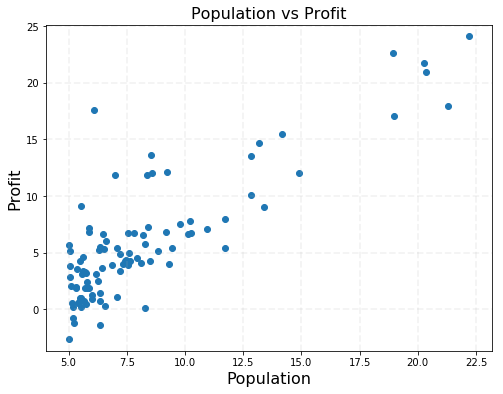

In [6]:
x = data.population   # feature
y = data.profit       # target

fig, ax = plt.subplots(1,1, figsize=(8,6))

f_size =16

# plot scatter plot
ax.scatter(x, y)
# set axes limits to make the scale nice
ax.set_xlim(np.min(x)-1, np.max(x) + 1)
ax.set_ylim(np.min(y)-1, np.max(y) + 1)
# set axis label
ax.set_xlabel('Population', fontsize = f_size)
ax.set_ylabel('Profit', fontsize = f_size)
# set up title
ax.set_title('Population vs Profit', fontsize = f_size)
# set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.15)

### sklearn Linear Regression

In [7]:
# resahpe feature for sklearn model traninng
x = np.array(x).reshape(-1, 1)

# Linear Regression from sklearn
simple_lr_model = LinearRegression()

# fit the model on data
simple_lr_model.fit(x, y)

# Intercept
beta_0 = simple_lr_model.intercept_
# Coefficient
beta_1 = simple_lr_model.coef_[0]

print("Intercept : ", beta_0)
print("Coefficient : ", beta_1)

Intercept :  -3.89578087831185
Coefficient :  1.1930336441895935


In [8]:
def plot_profit(model, poly_transformer=None):
    f_size = 14
    fig, ax = plt.subplots(1,1, figsize=(8,6))
   
    # build the x values for the prediction line
    x_vals = np.arange(x.min(), x.max(), 0.1).reshape(-1,1)
    
    # polynomial features applied?
    if poly_transformer != None:
        d = poly_transformer.fit_transform(x_vals)
    else:
        d = x_vals
    
    # make the prediction at each x value
    prediction = model.predict(d)

    ax.scatter(x, y)
    ax.plot(x_vals, prediction, c='r', label='Best Fit Line')

    ax.set_xlabel('Population', fontsize = f_size)
    ax.set_ylabel('Profit', fontsize = f_size)
    ax.set_title('Population vs Profit', fontsize = f_size)
    
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

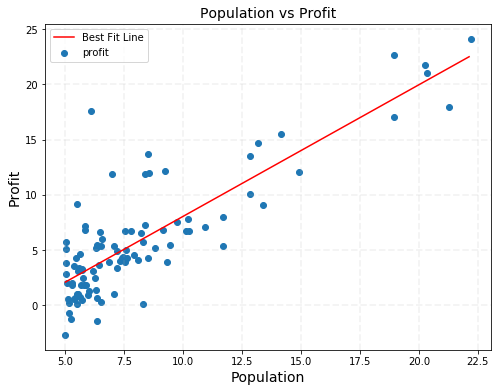

In [9]:
plot_profit(simple_lr_model)

### After adding polynomial features

In [10]:
# Apply polynomial features with degree 
poly_transformer = PolynomialFeatures(4, include_bias=False)

# Fit to data, then transform it.
x_expanded = poly_transformer.fit_transform(x)

# Apply Linear Regression to generated polynomial features
poly_lr_model = LinearRegression()

# fit the model on data
poly_lr_model.fit(x_expanded, y)

print("Intercept : ", poly_lr_model.intercept_)
print("Coefficients : ", poly_lr_model.coef_)

Intercept :  -20.19947932775026
Coefficients :  [ 7.63829133e+00 -8.70977340e-01  4.77228072e-02 -9.07387129e-04]


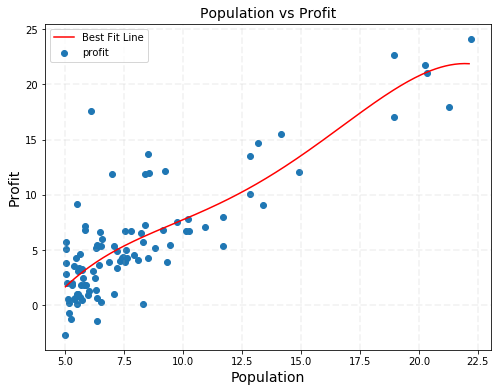

In [11]:
plot_profit(poly_lr_model, poly_transformer)